<a href="https://colab.research.google.com/github/raja-ankit06/raja-ankit06/blob/main/Crop_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# 1. Create directory
!mkdir -p ~/.kaggle

# 2. Upload your kaggle.json
from google.colab import files
files.upload()  # Upload kaggle.json here

# 3. Move it to correct location
!mv kaggle.json ~/.kaggle/

# 4. Set permissions
!chmod 600 ~/.kaggle/kaggle.json

# 5. Install kaggle package
!pip install -q kaggle

# 6. Download dataset
!kaggle datasets download -d emmarex/plantdisease

Saving kaggle (4).json to kaggle (4).json
mv: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown


In [ ]:
os.chmod('/root/.kaggle/kaggle.json', 600)


In [ ]:
!ls -l /root/.kaggle/kaggle.json


---x-wx--T 1 root root 66 May 10 03:06 /root/.kaggle/kaggle.json


In [ ]:
import os

# List files in the current directory
os.listdir('/content')


['.config', 'plantdisease.zip', 'kaggle (4).json', 'sample_data']

In [ ]:
!pip install kaggle


In [ ]:
import zipfile
import os

# Path to the downloaded zip file
zip_path = '/content/plantdisease.zip'


# Check if file exists before extracting
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('/content/data')
    print("✅ Dataset extracted successfully to /content/data!")
else:
    print("❌ Zip file not found. Please check the file path.")


✅ Dataset extracted successfully to /content/data!


In [ ]:
import os
base_dir = '/content/data'
print(os.listdir(base_dir))


['plantvillage', 'PlantVillage']


In [ ]:
# Check contents of both folders
folder1 = '/content/data/plantvillage'
folder2 = '/content/data/PlantVillage'

print("Contents of plantvillage folder:")
print(os.listdir(folder1))

print("\nContents of PlantVillage folder:")
print(os.listdir(folder2))


Contents of plantvillage folder:
['PlantVillage']

Contents of PlantVillage folder:
['Tomato_Early_blight', 'Pepper__bell___healthy', 'Tomato_Late_blight', 'Tomato_Septoria_leaf_spot', 'Potato___healthy', 'Tomato__Target_Spot', 'Potato___Late_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Leaf_Mold', 'Potato___Early_blight', 'Tomato_healthy', 'Tomato__Tomato_mosaic_virus', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Bacterial_spot', 'Pepper__bell___Bacterial_spot']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the ImageDataGenerator with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale images by 1/255 (to normalize pixel values)
    shear_range=0.2,  # Random shear for augmentation
    zoom_range=0.2,  # Random zoom for augmentation
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load training data
train_dir = '/content/data/PlantVillage'  # Path to your dataset

train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path to training data folder
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,  # Batch size for training
    class_mode='categorical',  # Multi-class classification
    subset='training'  # Specify that this is the training set
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir,  # Same folder, now with validation split
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify that this is the validation set
)


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()

# Convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer with 128 filters
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D feature maps into 1D vector
model.add(Flatten())

# Fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer with softmax activation for multi-class classification
model.add(Dense(15, activation='softmax'))  # 15 classes for 15 plant diseases

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,830,287 (18.43 MB)

 Trainable params: 4,830,287 (18.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
  train_generator,
  epochs=20,
  validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
517/517 ━━━━━━━━━━━━━━━━━━━━ 956s 2s/step - accuracy: 0.2791 - loss: 2.2291 - val_accuracy: 0.6405 - val_loss: 1.1178
Epoch 2/12
517/517 ━━━━━━━━━━━━━━━━━━━━ 931s 2s/step - accuracy: 0.5541 - loss: 1.3690 - val_accuracy: 0.7268 - val_loss: 0.8603
Epoch 3/12
517/517 ━━━━━━━━━━━━━━━━━━━━ 912s 2s/step - accuracy: 0.6313 - loss: 1.0716 - val_accuracy: 0.7914 - val_loss: 0.6430
Epoch 4/12
517/517 ━━━━━━━━━━━━━━━━━━━━ 920s 2s/step - accuracy: 0.6839 - loss: 0.9471 - val_accuracy: 0.8188 - val_loss: 0.5701
Epoch 5/12
517/517 ━━━━━━━━━━━━━━━━━━━━ 902s 2s/step - accuracy: 0.7119 - loss: 0.8429 - val_accuracy: 0.8523 - val_loss: 0.4629
Epoch 6/12
517/517 ━━━━━━━━━━━━━━━━━━━━ 898s 2s/step - accuracy: 0.7413 - loss: 0.7638 - val_accuracy: 0.8370 - val_loss: 0.5337
Epoch 7/12
517/517 ━━━━━━━━━━━━━━━━━━━━ 906s 2s/step - accuracy: 0.7550 - loss: 0.6903 - val_accuracy: 0.8712 - val_loss: 0.3930
Epoch 8/12
517/517 ━━━━━━━━━━━━━━━━━━━━ 896s 2s/step - accuracy: 0.7743 - loss: 0.6692 - val_accu

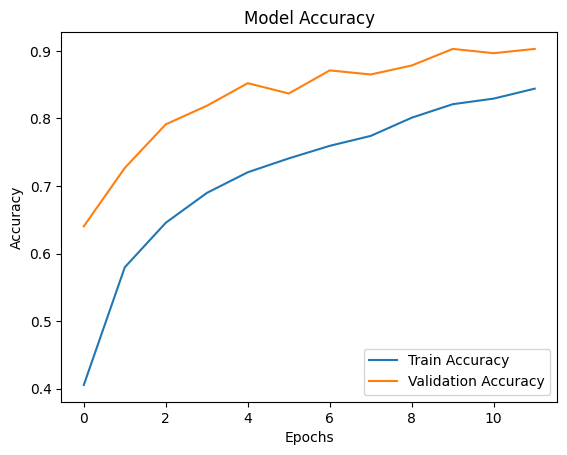

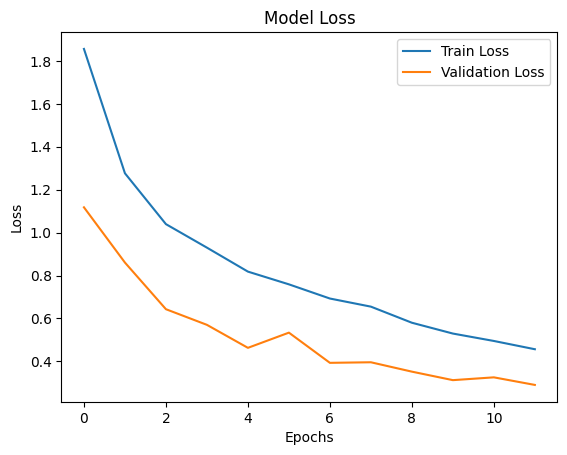

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save('plant_disease_model.h5')


Saving download (3).jpeg to download (3) (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted Class: Pepper__bell___Bacterial_spot


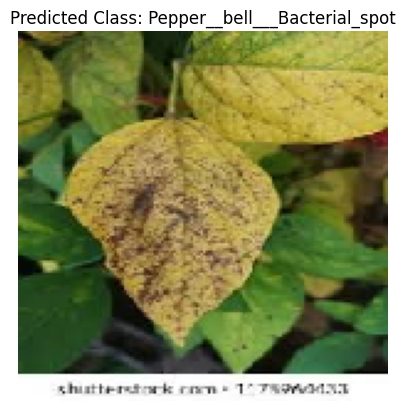

In [60]:
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Step 1: Upload image
uploaded = files.upload()

# Step 2: Get uploaded file name
img_path = next(iter(uploaded))

# Step 3: Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # resize as per model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalize & add batch dim

# Step 4: Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction[0])

# Step 5: Get label names from train_generator
class_labels = list(train_generator.class_indices.keys())

# Step 6: Output result
print(f"Predicted Class: {class_labels[predicted_class]}")

# Step 7: Show the image with the prediction
plt.imshow(img)
plt.title(f"Predicted Class: {class_labels[predicted_class]}")
plt.axis('off')  # Hide axes for better viewing
plt.show()


In [ ]:
from google.colab import files
files.download('plant_disease_model.h5')  # Tumhare model ka filename yaha hona chahiye


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Function to preprocess the image
def preprocess_image(img_path, target_size=(150, 150)):  # Adjusted target size
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# Load your model
model = load_model('plant_disease_model.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess the image
img_path = r'/content/potato_leaf.jpg'
preprocessed_img = preprocess_image(img_path)

# Make prediction
prediction = model.predict(preprocessed_img)

# Get the predicted class
predicted_class_index = np.argmax(prediction)

# Assuming you have class labels from your training data
class_labels = list(train_generator.class_indices.keys())  # Get labels from training generator

# Print the predicted class
predicted_class = class_labels[predicted_class_index]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Predicted class: Potato___Early_blight


In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [53]:
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Load model
model = load_model("plant_disease_model.h5")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define train_generator (similar to your training code)
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_dir = '/content/data/PlantVillage'  # Or wherever your training data is located
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

# Class names
class_names = list(train_generator.class_indices.keys())

st.title("🌿 Plant Disease Detection App")

uploaded_file = st.file_uploader("Upload a leaf image", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    img = Image.open(uploaded_file)
    st.image(img, caption='Uploaded Image', use_column_width=True)

    # Preprocessing
    img = img.resize((150, 150))  # Resize to match model input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]

    st.success(f"✅ Predicted Disease: **{predicted_class}**")

Found 20638 images belonging to 15 classes.


2025-05-10 08:02:21.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 08:02:21.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 08:02:21.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 08:02:21.398 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 08:02:21.399 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 08:02:21.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 08:02:21.402 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
!ngrok config add-authtoken 2wtPyMyoLgDFC0zHrOhnkyBVx6S_6kiKS8nGqhjyDBLS4QPRr


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!curl https://loca.lt/mytunnelpassword


34.168.28.146

In [58]:
import streamlit as st
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os

# Load model
model = load_model("plant_disease_model.h5")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Function to preprocess image
def preprocess_image(img_path, target_size=(150, 150)):  # Adjusted target size
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# Streamlit UI
st.title("Crop Disease Prediction")
uploaded_image = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_image is not None:
    # Define train_generator to get class names (similar to your training code)
    train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
    train_dir = '/content/data/PlantVillage'  # Or wherever your training data is located
    train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                        batch_size=32, class_mode='categorical')

    class_names = list(train_generator.class_indices.keys())

    # Preprocess image
    img = preprocess_image(uploaded_image)

    # Make prediction
    prediction = model.predict(img)
    predicted_class_index = np.argmax(prediction)  # Get predicted class index
    predicted_class = class_names[predicted_class_index]  # Get class name

    # Display the result
    st.image(uploaded_image, caption="Uploaded Image.", use_column_width=True)
    st.write(f"Predicted Class: {predicted_class}")  # Display predicted class

2025-05-10 08:09:32.121 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 08:09:32.122 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 08:09:32.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 08:09:32.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 08:09:32.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 08:09:32.130 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 08:09:32.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [59]:
!streamlit run app.py & npx localtunnel --port 8501




⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.28.146:8501

⠦your url is: https://green-areas-jog.loca.lt
y
2025-05-10 08:12:04.533354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746864724.561817   75349 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746864724.569771   75349 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-10 08:12:09.724956: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
──────────────────────────